<h1>Data Augmentation</h1><br><br>
Wie bereits gesagt, ist die erste Methode, um Overfitting zu vermeiden, das Netzwerk mit mehr Daten zu trainieren. Hättest du unendlich viele Daten, wäre dein Modell jeder Möglichkeit ausgesetzt. Etwas ähnliches ist mit data augmentation möglich, wobei es das Ziel ist, dass das Modell nie das gleiche Bild zwei mal sieht. Dazu wird der Generator zufällig leichte Veränderungen am Bild vornehmen.

(150, 150, 3)
(1, 150, 150, 3)


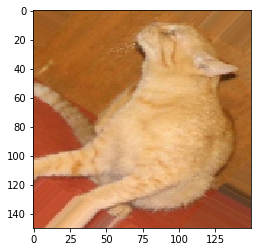

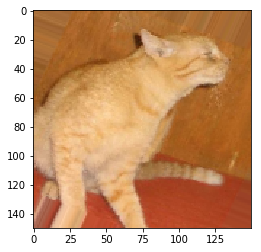

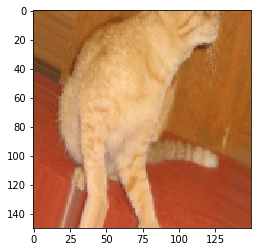

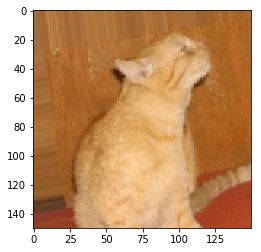

In [2]:
from keras.preprocessing.image import ImageDataGenerator, image
import matplotlib.pyplot as plt
import os, random

org_data_dir = '/home/dominik/Documents/Datasets/cats_and_doggos/train'
small_data_dir = '/home/dominik/Documents/Datasets/cats_and_doggos/small'

train_dir = os.path.join(small_data_dir, 'train')
val_dir = os.path.join(small_data_dir, 'val')
test_dir = os.path.join(small_data_dir, 'test')

train_cats_dir = os.path.join(train_dir, 'cat')
val_cats_dir = os.path.join(val_dir, 'cat')
test_cats_dir = os.path.join(test_dir, 'cat')

train_dogs_dir = os.path.join(train_dir, 'dog')
val_dogs_dir = os.path.join(val_dir, 'dog')
test_dogs_dir = os.path.join(test_dir, 'dog')

data_generator = ImageDataGenerator(
    rotation_range = 40, # zufällige Drehung zwischen 0 und 180 Grad
    width_shift_range = 0.2,
    height_shift_range = 0.2, # zufällige Verschiebung des Bildes, als Anteil am Bild
    shear_range = 0.2, # nach hinten/vorne "gekippt"
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest' # method for filling newly created pixels
)

file_names = [os.path.join(train_cats_dir, file_name) for file_name in os.listdir(train_cats_dir)]
img_path = random.choice(file_names)
img = image.load_img(img_path, target_size = (150, 150))
img = image.img_to_array(img)
print(img.shape)
print((1, ) + img.shape)
img = img.reshape((1, ) + img.shape)

i = 0
for batch in data_generator.flow(img, batch_size = 1):
    plt.figure(i)
    img_plot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

plt.show()